In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.9 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 26.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 27.8 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 3/8 [fonttools]  WARNING: The scripts fonttools, pyftmerge, pyftsubset and ttx are installed in '/home/jovyan/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [39]:
df = pd.read_csv("agg3.csv")

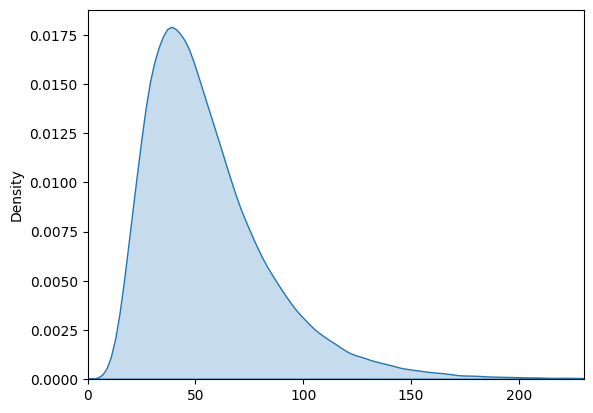

In [78]:
#Find distribution of transaction amount
data = df["Amount"]
data = [abs(x) for x in data]
sns.kdeplot(data, fill=True)
plt.xlim(0, 230)
plt.show()

In [40]:
#Number of days since account opened
df['OpenDate'] = pd.to_datetime(df['OpenDate'])
df['Timestamp_dt'] = pd.to_datetime(df['Timestamp_dt'])
df["days_since_open"] = (df["Timestamp_dt"] - df["OpenDate"]).dt.days
df["days_since_open"]

0         1744
1          100
2         1345
3          547
4           76
          ... 
152310    1550
152311    1550
152312    1364
152313     765
152314    1711
Name: days_since_open, Length: 152315, dtype: int64

In [20]:
# #Ip change rate, calculate the fraction of sessions with new ip address
# sessions = pd.read_json("/home/jovyan/shared/datasets/RetailBanking/device_sessions_all.json", convert_dates=["Timestamp"])

# # Sort sessions chronologically for each customer
# sessions = sessions.sort_values(["CustomerID", "Timestamp"])

# # For each customer, compare current IP to previous IP
# sessions["prev_IP"] = sessions.groupby("CustomerID")["IP"].shift(1)

# # Flag sessions where IP changed
# sessions["ip_changed"] = (sessions["IP"] != sessions["prev_IP"]).astype(int)

# # Compute rate per customer
# ip_change_rate = (
#     sessions.groupby("CustomerID")["ip_changed"]
#     .mean()
#     .reset_index()
#     .rename(columns={"ip_changed": "ip_change_rate"})
# )

In [30]:
# ip_change_rate

In [31]:
# sessions

In [32]:
# sessions['ip_changed'].value_counts()

In [53]:
#Time since last transaction for each customer

# transactions = pd.read_csv("/home/jovyan/shared/datasets/RetailBanking/transactions_train.csv", parse_dates=["Timestamp"])

df['Timestamp_dt'] = pd.to_datetime(transactions['Timestamp_dt'],format="%Y/%m/%d")
df = df.sort_values(["CustomerID", "Timestamp_dt"])

df["prev_Timestamp"] = df.groupby("CustomerID")["Timestamp_dt"].shift(1)
df["time_since_last_txn"] = (df["Timestamp_dt"] - df["prev_Timestamp"])
df["time_since_last_txn_hours"] = ((df["Timestamp_dt"] - df["prev_Timestamp"]).dt.total_seconds() / 3600).fillna(0).astype(int)

In [54]:
transactions

,Timestamp_dt,TxnID,Timestamp,SessionID,CustomerID,SrcAccount,DstAccount,Channel,MCC_Group,Amount,FraudLabel,prev_Timestamp,time_since_last_txn,time_since_last_txn_hours
1967,2025-01-03 09:39:00,da3b1da1-2e6f-430b-ab02-b1678bbfccb8,2025/1/3 9:39,NaN,C000005,A166e5515,NaN,branch,Online Retail,44.416179,0,NaT,NaT,0
2624,2025-01-04 03:14:00,19307e39-75f2-44ea-a1ce-6b6cc2f51f2e,2025/1/4 3:14,NaN,C000005,A166e5515,NaN,branch,Other,68.530604,0,2025-01-03 09:39:00,0 days 17:35:00,17
4867,2025-01-06 19:32:00,aa2c3179-2917-4398-86ec-0f2e079f1128,2025/1/6 19:32,NaN,C000005,A166e5515,NaN,branch,Restaurants,33.508761,0,2025-01-04 03:14:00,2 days 16:18:00,64
6036,2025-01-08 04:54:00,dfd36246-ff9a-4458-98dc-df89aaa15cf2,2025-01-08T04:54:44,9310915d-dd73-47a6-994e-278811596da8,C000005,A166e5515,NaN,online,Online Retail,-33.583612,0,2025-01-06 19:32:00,1 days 09:22:00,33
6701,2025-01-09 00:16:00,c4439812-4659-48fc-8b9b-2b0d2e6009d7,2025/1/9 0:16,NaN,C000005,A166e5515,NaN,ATM,Restaurants,122.470921,0,2025-01-08 04:54:00,0 days 19:22:00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150502,2025-06-28 19:01:00,d5e6c023-54ab-4f31-ae8a-c3264b6a6302,2025/6/28 19:01,NaN,C001000,Aeab65b63,NaN,ATM,Other,56.881983,0,2025-06-28 08:44:00,0 days 10:17:00,10
150669,2025-06-28 23:19:00,197a9dfb-e09d-4921-94b5-3928646baa63,2025/6/28 23:19,NaN,C001000,Aeab65b63,NaN,branch,Groceries,19.325107,0,2025-06-28 19:01:00,0 days 04:18:00,4
150827,2025-06-29 03:56:00,8ee2858f-8d36-498d-a235-a4d31481be86,2025/6/29 3:56,NaN,C001000,A5cd91130,NaN,branch,Utilities,48.718987,0,2025-06-28 23:19:00,0 days 04:37:00,4
150849,2025-06-29 04:27:00,f96e1705-41a3-43cb-8bb7-e8e3e488451a,2025/6/29 4:27,NaN,C001000,A5cd91130,NaN,branch,Other,35.574378,0,2025-06-29 03:56:00,0 days 00:31:00,0


In [46]:
#Xacts per day for each customer

# Xacts = pd.read_csv("/home/jovyan/shared/datasets/RetailBanking/transactions_train.csv")
df['Timestamp_dt'] = pd.to_datetime(df['Timestamp_dt'],format="%Y/%m/%d")
df = df.sort_values(["CustomerID", "Timestamp_dt"])
df["day"] = df["Timestamp_dt"].dt.floor("D")
df["xacts_earlier_today"] = (
    df.groupby(["CustomerID", "day"])
      .cumcount()
)
df

,Unnamed: 0,Timestamp_dt,TxnID,Timestamp_x,Online,CustomerID,SrcAccount,DstAccount,Channel,MCC_Group,...,Login_Count,Logout_Count,Account_View_Count,Payment_Count,Transfer_Count,Day_of_Week,Timestamp,days_since_open,day,xacts_earlier_today
1967,1967,2025-01-03 09:39:00,da3b1da1-2e6f-430b-ab02-b1678bbfccb8,2025/1/3 9:39,0,C000005,A166e5515,NaN,branch,Online Retail,...,0,0,0,0,0,Friday,09:39:00,56,2025-01-03,0
2624,2624,2025-01-04 03:14:00,19307e39-75f2-44ea-a1ce-6b6cc2f51f2e,2025/1/4 3:14,0,C000005,A166e5515,NaN,branch,Other,...,0,0,0,0,0,Saturday,03:14:00,57,2025-01-04,0
4867,4867,2025-01-06 19:32:00,aa2c3179-2917-4398-86ec-0f2e079f1128,2025/1/6 19:32,0,C000005,A166e5515,NaN,branch,Restaurants,...,0,0,0,0,0,Monday,19:32:00,59,2025-01-06,0
6036,6036,2025-01-08 04:54:00,dfd36246-ff9a-4458-98dc-df89aaa15cf2,2025-01-08T04:54:44,1,C000005,A166e5515,NaN,online,Online Retail,...,1,1,0,1,0,Wednesday,04:54:00,61,2025-01-08,0
6701,6701,2025-01-09 00:16:00,c4439812-4659-48fc-8b9b-2b0d2e6009d7,2025/1/9 0:16,0,C000005,A166e5515,NaN,ATM,Restaurants,...,0,0,0,0,0,Thursday,00:16:00,62,2025-01-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150502,150502,2025-06-28 19:01:00,d5e6c023-54ab-4f31-ae8a-c3264b6a6302,2025/6/28 19:01,0,C001000,Aeab65b63,NaN,ATM,Other,...,0,0,0,0,0,Saturday,19:01:00,2279,2025-06-28,3
150669,150669,2025-06-28 23:19:00,197a9dfb-e09d-4921-94b5-3928646baa63,2025/6/28 23:19,0,C001000,Aeab65b63,NaN,branch,Groceries,...,0,0,0,0,0,Saturday,23:19:00,2279,2025-06-28,4
150827,150827,2025-06-29 03:56:00,8ee2858f-8d36-498d-a235-a4d31481be86,2025/6/29 3:56,0,C001000,A5cd91130,NaN,branch,Utilities,...,0,0,0,0,0,Sunday,03:56:00,1720,2025-06-29,0
150849,150849,2025-06-29 04:27:00,f96e1705-41a3-43cb-8bb7-e8e3e488451a,2025/6/29 4:27,0,C001000,A5cd91130,NaN,branch,Other,...,0,0,0,0,0,Sunday,04:27:00,1720,2025-06-29,1


In [49]:
#Amount deviation

# df = pd.read_csv("/home/jovyan/shared/datasets/RetailBanking/transactions_train.csv", parse_dates=["Timestamp_dt"])
df['Timestamp_dt'] = pd.to_datetime(df['Timestamp_dt'],format="%Y/%m/%d %H:%M")
df = df.sort_values(["CustomerID", "Timestamp_dt"])
df["avg_amount_past"] = (df.groupby("CustomerID")["Amount"]).transform(lambda x: x.shift(1).rolling(10, min_periods=1).mean())

#Measure direction, >1 spending more than usual <1 less
df["amount_ratio"] = df["Amount"]/df["avg_amount_past"]

#Deviation Mesaure distance from mean, regardless of direction. 0 normal higher means unusual
df["amount_dev"] = (abs(df["Amount"] - df["avg_amount_past"]))/df["avg_amount_past"]

In [50]:
df

,Timestamp_dt,TxnID,Timestamp,SessionID,CustomerID,SrcAccount,DstAccount,Channel,MCC_Group,Amount,FraudLabel,avg_amount_past,amount_ratio,amount_dev
1967,2025-01-03 09:39:00,da3b1da1-2e6f-430b-ab02-b1678bbfccb8,2025/1/3 9:39,NaN,C000005,A166e5515,NaN,branch,Online Retail,44.416179,0,NaN,NaN,NaN
2624,2025-01-04 03:14:00,19307e39-75f2-44ea-a1ce-6b6cc2f51f2e,2025/1/4 3:14,NaN,C000005,A166e5515,NaN,branch,Other,68.530604,0,44.416179,1.542920,0.542920
4867,2025-01-06 19:32:00,aa2c3179-2917-4398-86ec-0f2e079f1128,2025/1/6 19:32,NaN,C000005,A166e5515,NaN,branch,Restaurants,33.508761,0,56.473391,0.593355,0.406645
6036,2025-01-08 04:54:00,dfd36246-ff9a-4458-98dc-df89aaa15cf2,2025-01-08T04:54:44,9310915d-dd73-47a6-994e-278811596da8,C000005,A166e5515,NaN,online,Online Retail,-33.583612,0,48.818515,-0.687928,1.687928
6701,2025-01-09 00:16:00,c4439812-4659-48fc-8b9b-2b0d2e6009d7,2025/1/9 0:16,NaN,C000005,A166e5515,NaN,ATM,Restaurants,122.470921,0,28.217983,4.340173,3.340173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150502,2025-06-28 19:01:00,d5e6c023-54ab-4f31-ae8a-c3264b6a6302,2025/6/28 19:01,NaN,C001000,Aeab65b63,NaN,ATM,Other,56.881983,0,33.365957,1.704791,0.704791
150669,2025-06-28 23:19:00,197a9dfb-e09d-4921-94b5-3928646baa63,2025/6/28 23:19,NaN,C001000,Aeab65b63,NaN,branch,Groceries,19.325107,0,35.877029,0.538648,0.461352
150827,2025-06-29 03:56:00,8ee2858f-8d36-498d-a235-a4d31481be86,2025/6/29 3:56,NaN,C001000,A5cd91130,NaN,branch,Utilities,48.718987,0,34.177549,1.425468,0.425468
150849,2025-06-29 04:27:00,f96e1705-41a3-43cb-8bb7-e8e3e488451a,2025/6/29 4:27,NaN,C001000,A5cd91130,NaN,branch,Other,35.574378,0,34.690560,1.025477,0.025477


In [51]:
#MCC group

# df = pd.read_csv("/home/jovyan/shared/datasets/RetailBanking/transactions_train.csv", parse_dates=["Timestamp_dt"])
df['Timestamp_dt'] = pd.to_datetime(df['Timestamp_dt'],format="%Y/%m/%d %H:%M")
df = df.sort_values(["CustomerID", "Timestamp_dt"])
df["mcc_group_prev_count"] = (df.groupby(["CustomerID", "MCC_Group"]).cumcount())

In [68]:
Xacts[Xacts["CustomerID"] == "C000005"]

,Timestamp_dt,TxnID,Timestamp,SessionID,CustomerID,SrcAccount,DstAccount,Channel,MCC_Group,Amount,FraudLabel,mcc_group_prev_count
1967,2025-01-03 09:39:00,da3b1da1-2e6f-430b-ab02-b1678bbfccb8,2025/1/3 9:39,NaN,C000005,A166e5515,NaN,branch,Online Retail,44.416179,0,0
2624,2025-01-04 03:14:00,19307e39-75f2-44ea-a1ce-6b6cc2f51f2e,2025/1/4 3:14,NaN,C000005,A166e5515,NaN,branch,Other,68.530604,0,0
4867,2025-01-06 19:32:00,aa2c3179-2917-4398-86ec-0f2e079f1128,2025/1/6 19:32,NaN,C000005,A166e5515,NaN,branch,Restaurants,33.508761,0,0
6036,2025-01-08 04:54:00,dfd36246-ff9a-4458-98dc-df89aaa15cf2,2025-01-08T04:54:44,9310915d-dd73-47a6-994e-278811596da8,C000005,A166e5515,NaN,online,Online Retail,-33.583612,0,1
6701,2025-01-09 00:16:00,c4439812-4659-48fc-8b9b-2b0d2e6009d7,2025/1/9 0:16,NaN,C000005,A166e5515,NaN,ATM,Restaurants,122.470921,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
144442,2025-06-21 14:06:00,7ce1d5ea-557f-4650-8162-fd6b673fce5f,2025/6/21 14:06,NaN,C000005,A166e5515,NaN,ATM,Groceries,65.520925,0,36
145668,2025-06-23 00:48:00,04cce90f-a6fd-4351-96ea-de368ae48507,2025/6/23 0:48,NaN,C000005,A166e5515,NaN,branch,Online Retail,62.249141,0,18
146589,2025-06-24 02:30:00,f9ff89f7-42a9-48f3-acd4-03c09fd9fb2c,2025/6/24 2:30,NaN,C000005,A166e5515,NaN,branch,Online Retail,46.028610,0,19
147667,2025-06-25 09:02:00,90266fed-eb18-4bb4-9186-66f10bfb4f64,2025/6/25 9:02,NaN,C000005,A166e5515,NaN,ATM,Groceries,63.094479,0,37


In [52]:
df[df["CustomerID"] == "C000005"]

,Timestamp_dt,TxnID,Timestamp,SessionID,CustomerID,SrcAccount,DstAccount,Channel,MCC_Group,Amount,FraudLabel,avg_amount_past,amount_ratio,amount_dev,mcc_group_prev_count
1967,2025-01-03 09:39:00,da3b1da1-2e6f-430b-ab02-b1678bbfccb8,2025/1/3 9:39,NaN,C000005,A166e5515,NaN,branch,Online Retail,44.416179,0,NaN,NaN,NaN,0
2624,2025-01-04 03:14:00,19307e39-75f2-44ea-a1ce-6b6cc2f51f2e,2025/1/4 3:14,NaN,C000005,A166e5515,NaN,branch,Other,68.530604,0,44.416179,1.542920,0.542920,0
4867,2025-01-06 19:32:00,aa2c3179-2917-4398-86ec-0f2e079f1128,2025/1/6 19:32,NaN,C000005,A166e5515,NaN,branch,Restaurants,33.508761,0,56.473391,0.593355,0.406645,0
6036,2025-01-08 04:54:00,dfd36246-ff9a-4458-98dc-df89aaa15cf2,2025-01-08T04:54:44,9310915d-dd73-47a6-994e-278811596da8,C000005,A166e5515,NaN,online,Online Retail,-33.583612,0,48.818515,-0.687928,1.687928,1
6701,2025-01-09 00:16:00,c4439812-4659-48fc-8b9b-2b0d2e6009d7,2025/1/9 0:16,NaN,C000005,A166e5515,NaN,ATM,Restaurants,122.470921,0,28.217983,4.340173,3.340173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144442,2025-06-21 14:06:00,7ce1d5ea-557f-4650-8162-fd6b673fce5f,2025/6/21 14:06,NaN,C000005,A166e5515,NaN,ATM,Groceries,65.520925,0,-6.703106,-9.774712,-10.774712,36
145668,2025-06-23 00:48:00,04cce90f-a6fd-4351-96ea-de368ae48507,2025/6/23 0:48,NaN,C000005,A166e5515,NaN,branch,Online Retail,62.249141,0,6.103210,10.199411,9.199411,18
146589,2025-06-24 02:30:00,f9ff89f7-42a9-48f3-acd4-03c09fd9fb2c,2025/6/24 2:30,NaN,C000005,A166e5515,NaN,branch,Online Retail,46.028610,0,7.758444,5.932712,4.932712,19
147667,2025-06-25 09:02:00,90266fed-eb18-4bb4-9186-66f10bfb4f64,2025/6/25 9:02,NaN,C000005,A166e5515,NaN,ATM,Groceries,63.094479,0,20.610148,3.061331,2.061331,37


In [2]:
from datetime import timedelta
sessions = pd.read_json("/home/jovyan/shared/datasets/RetailBanking/device_sessions_all.json")
sessions = sessions.sort_values(["CustomerID", "Timestamp"])
sessions["Timestamp"] = pd.to_datetime(sessions["Timestamp"])
sessions["device_use_past_90d"] = (
    sessions
    .groupby(["CustomerID", "DeviceID"])
    .rolling("90D", on="Timestamp")
    .count()["SessionID"]
    .reset_index(level=[0,1], drop=True)
    - 1 
)

In [3]:
sessions[(sessions["CustomerID"] == "C000002") & (sessions["DeviceID"] == "1A8B0A")]

,CustomerID,SessionID,Timestamp,City,IP,DeviceID,Actions,device_use_past_90d
113,C000002,baaba214-14e6-4677-8bb6-7ecd874ad3b6,2025-01-03 04:51:20,City023,10.243.222.72,1A8B0A,"[login, {'type': 'account_view'}, {'type': 'ac...",0.0
114,C000002,0211e794-96e5-4f27-b00f-841718f51ecf,2025-01-03 19:50:35,City023,10.243.254.55,1A8B0A,"[login, logout]",1.0
118,C000002,17023a55-d786-467c-8fe7-ec2ec24cef5e,2025-01-14 06:50:12,City023,10.243.244.49,1A8B0A,"[login, {'type': 'account_view'}, logout]",2.0
119,C000002,79a75782-c105-46b0-99be-a63d090256e4,2025-01-24 22:15:11,City023,10.243.204.25,1A8B0A,"[login, logout]",3.0
124,C000002,36803767-8b48-46a1-9416-fb019a69e4c0,2025-01-31 23:58:40,City023,10.243.204.16,1A8B0A,"[login, logout]",4.0
125,C000002,8281fd49-b2c6-4ad2-b719-b250f942e0eb,2025-02-01 15:15:12,City023,10.243.243.187,1A8B0A,"[login, {'type': 'account_view'}, {'type': 'ac...",5.0
133,C000002,a4e7f5db-e5d1-48ab-8447-fec6bcb4ea45,2025-02-18 03:06:48,City023,10.243.201.114,1A8B0A,"[login, {'type': 'payment', 'account': 'A04c87...",6.0
137,C000002,dc193b15-00cc-4a7a-a3dc-fbdafead589e,2025-02-24 14:11:49,City023,10.243.222.43,1A8B0A,"[login, {'type': 'account_view'}, logout]",7.0
139,C000002,3a0d3c7a-09a7-48cd-9ce7-16e8ace91623,2025-02-28 21:55:57,City023,10.243.253.55,1A8B0A,"[login, logout]",8.0
141,C000002,b58c91d1-e10c-4f83-9a29-98bc701a7d6d,2025-03-01 20:19:44,City023,10.243.199.43,1A8B0A,"[login, {'type': 'payment', 'account': 'A04c87...",9.0
